Author: Etienne Doumazane (Nicolas Renier's lab, Paris Brain Institute)

This notebook describes the method used to: 
- open a raw volumetric image in a Napari viewer 
- create an empty "Points" layer 
- add manually points
- save the coordinates of the points into a CSV file

and to:
- open a raw volumetric image in a Napari viewer 
- open the coordinates in a CSV file, as saved in the previous step and visualize

# Imports

In [44]:
from pathlib import Path
import pandas as pd
from icm_tools.visualization import view_img, view_points, get_points

# Open the image

In [45]:
img_3d_folder = "/path/to/folder/"
img_3d_fname = "450_Stitched_C1.tif"
img_3d_path = Path(img_3d_folder) / img_3d_fname

In [46]:
viewer = view_img(img_3d_path, colormap="gray", contrast_limits=[0, 10_000], name="Raw image")

# Open an empty `Points` layer

In [47]:
viewer.add_points([], name="Points",  edge_color="red", out_of_slice_display=True, size=50, edge_width=0.1, face_color="#00000000", ndim=3)

<Points layer 'Points' at 0x7f4566299630>

# Add manually points in the `Points` layer

Select the `Points` layer and click on the `+` button at the top

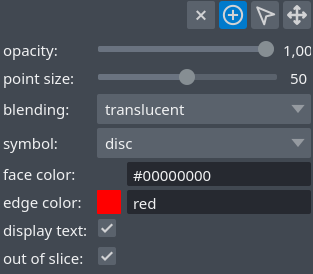

# Save the coordinates into a CSV file


In [48]:
save_folder = Path.home()
save_fname = "test_coords.csv"
save_path = Path(save_folder) / save_fname

In [49]:
point_coords = get_points()
df = pd.DataFrame(point_coords, columns=["z", "y", "x"])
df.to_csv(save_path, index=False)

# Open an existing CSV file

In [42]:
img_3d_folder = "/path/to/folder/"
img_3d_fname = "450_Stitched_C1.tif"
img_3d_path = Path(img_3d_folder) / img_3d_fname

points_folder = "/path/to/folder/"
points_fname = "coords_450.csv"
points_path = Path(points_folder) / points_fname

In [50]:
viewer = view_img(img_3d_path, colormap="gray", contrast_limits=[0, 10_000], name="Raw image")

In [51]:
point_coords = pd.read_csv(points_path)[["z", "y", "x"]].values
viewer = view_points(point_coords, name="saved points", edge_color="green", out_of_slice_display=True, size=50, edge_width=0.1, face_color="#00000000")